# Political stance classification using Logistic regresion

This notebook is a code for logistic regression to classify political orientation of the given text.

It requires install below packages.


In [1]:
!pip install sklearn --quiet
!pip install scikit-plot --quiet

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # To save a model as binary.

# For tokenization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text, _stop_words

# For logistic regression
from sklearn.linear_model import LogisticRegression

# Classification Report
from sklearn.metrics import classification_report

# To show confusion matix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

Before executing this notebook, please modify below paths for your own setup.

In [3]:
path_for_opening_data = '/content/drive/MyDrive/Data_NMA_Polaris/Polaris_Data/'
path_for_saving_model = './'

Now, load the data. You can get the original data below via [this link](https://drive.google.com/drive/folders/1HVmXj-dzE0WfLxuOiT4dCcuKpd7ujOOo?usp=sharing). Please put these csv files on your '''path_for_opening_data''' folder.

In [4]:
# Load Data set.
df_train = pd.read_csv(path_for_opening_data+"BIGNEWS_cleaned_train_204000.csv",index_col=0)
df_test = pd.read_csv(path_for_opening_data+"BIGNEWS_cleaned_test_25500.csv",index_col=0)
df_val = pd.read_csv(path_for_opening_data+"BIGNEWS_cleaned_val_25500.csv",index_col=0)


We label relative stance of the data as 0,1, and 2 for the left, center and right. 

In [ ]:
# Hot encoding

df_train.relative_stance = df_train.relative_stance.replace({'left': 0, 'center': 1, 'right': 2})
df_test.relative_stance = df_test.relative_stance.replace({'left': 0, 'center': 1, 'right': 2})
df_val.relative_stance = df_val.relative_stance.replace({'left': 0, 'center': 1, 'right': 2})

Now we also add some stop words. Stop words means that the words which are replaced with "unknown word" in the process of tokenization. We set URL addresses and media outlet's names as stop words.

In [18]:

# Stop words
additional_politics_english_stop = ['www', 'things', 'does', 'x200b', 'amp', 'want', 'watch',
                           'just', 'like', 'https', 'com', 'republican', 'republicans',
                           'libertarians', 'democrats', 'democrat', 'people', 'libertarian',
                           'says', 'say', 'said', 'did', 'this', 'conservative', 'conservatives', 'huffpost', 'washingtontimes', 'cnnopinion', 'washpost', 'hillicon', 'foxnews', 'cnn', 'washington', 'foxnews', 'fox', 'breitbart', 'thehill', 'ap', 'washington post', 'new york times', 'huffington post', 'huffington', 'cnn', 'the hill', 'usatoday', 'associated press']

additional_english_stop = ['www', 'things', 'does', 'x200b', 'amp',
                           'just', 'like', 'https', 'com', 'watch', 'want',
                           'says', 'say', 'said', 'did', 'this']

new_stop_list = _stop_words.ENGLISH_STOP_WORDS.union(additional_english_stop)
new_politics_english_stop_list = _stop_words.ENGLISH_STOP_WORDS.union(additional_politics_english_stop)
new_politics_english_stop_list = new_politics_english_stop_list.union(df_train.source.unique())

Now we generate training data and test data for texts and relative stances.

In [6]:
x_train_text = df_train['text'].values
y_train = df_train.relative_stance.values

x_test_text = df_test['text'].values
y_test = df_test.relative_stance.values

Using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function, we tokenize those train and test sets with our predefined stop words.

In [7]:
vect=CountVectorizer(binary=True,stop_words=new_politics_english_stop_list)
x_train_cv = vect.fit_transform(x_train_text)
x_test_cv = vect.transform(x_test_text)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['associated', 'new', 'post', 'press', 'times', 'york'] not in stop_words.
  % sorted(inconsistent)


Now, it's time to train our Logistic regression model! 

**Warning** It takes an hour for the original data. 

In [8]:
# implementing for multinomial logistic (ignoring order)
model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='newton-cg')
clf = model.fit(x_train_cv,y_train)

You can save your model using [pickle](https://docs.python.org/3/library/pickle.html) for future use.

In [9]:
# Save the model
with open('/content/drive/MyDrive/Data_NMA_Polaris/model_logistic_regression.pkl', 'rb') as file:
  clf =pickle.load(file)

Now we wants to what kind of words have high coefficients related to each class. 

In [10]:
# initialize data of lists.

wordsarr=np.array(vect.get_feature_names_out())
coefs=np.array(clf.coef_)
data = {'words': wordsarr, 'left_p':coefs[0,:], 'center_p':coefs[1,:], 'right_p':coefs[2,:]}
coefdf = pd.DataFrame(data)

This is the list of 15 words whose occurence in the logistic regression are top in 'Left' articles.

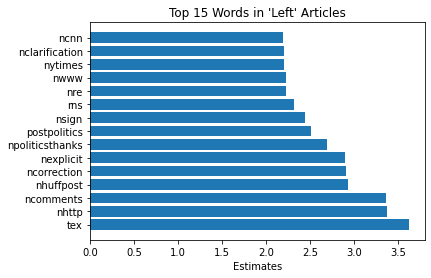

In [19]:
coefdf=coefdf.sort_values(by=['left_p'], ascending = False)
short=coefdf.head(15)
plt.barh(short.words.values,short.left_p.values)
plt.title("Top 15 Words in 'Left' Articles")
plt.xlabel("Estimates")
plt.show()

This is the list of 15 words whose occurence in the logistic regression are top in 'Center' articles.

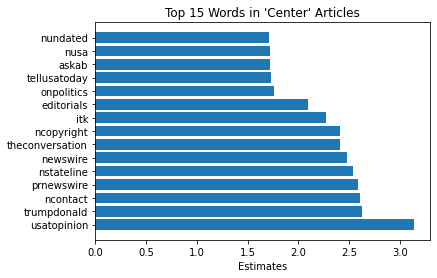

In [21]:
coefdf=coefdf.sort_values(by=['center_p'], ascending = False)
short=coefdf.head(15)
plt.barh(short.words.values,short.center_p.values)
plt.title("Top 15 Words in 'Center' Articles")
plt.xlabel("Estimates")
plt.show()

This is the list of 15 words whose occurence in the logistic regression are top in 'Right' articles.

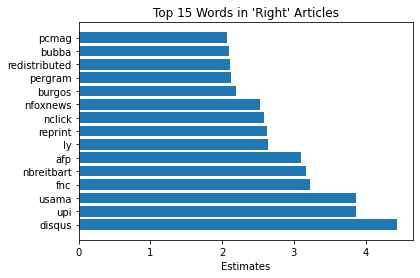

In [22]:
coefdf=coefdf.sort_values(by=['right_p'], ascending = False)
short=coefdf.head(15)
plt.barh(short.words.values,short.right_p.values)
plt.title("Top 15 Words in 'Right' Articles")
plt.xlabel("Estimates")
plt.show()

Also, we can get a classification report on our test set. In average, we got 67% of the test accuracy.

In [23]:
y_pred = clf.predict(x_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69      8393
           1       0.66      0.67      0.66      8597
           2       0.67      0.66      0.66      8510

    accuracy                           0.67     25500
   macro avg       0.67      0.67      0.67     25500
weighted avg       0.67      0.67      0.67     25500



Lastly, the confusion matrix can be shown below.

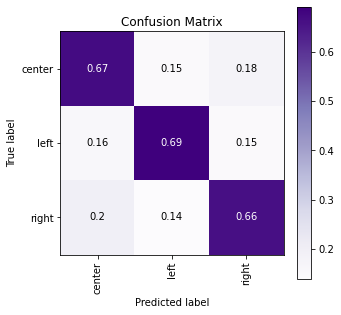

In [24]:
target_classes = ["left", "center", "right"]
skplt.metrics.plot_confusion_matrix([target_classes[i] for i in y_test], [target_classes[i] for i in y_pred],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    hide_zeros=True,
                                    figsize=(5,5)
                                    );
plt.xticks(rotation=90);